# TD3 Word Embeddings
## Exercice n°1 : Constitution des sous-corpus

In [10]:
import io

"""
# Exemple ouverture d'un fichier pour lire
inFilePath = 'file.txt'
inFile = io.open(inFilePath, mode='r', encoding='utf-8')
line = inFile.readlines()
inFile.close()

# Exemple ouverture d'un fichier pour ecrire
outFilePath = 'file.txt'
s = "Ceci est un enonce."
outFile = io.open(outFilePath, mode='r', encoding='utf-8')
outFile.write(s)
outFile.close
"""

gauche, droite, parti = '', '', ''
corpusPath = './content/HYPERBASE_Droite_VS_Gauche.txt'

inFile = io.open(corpusPath, mode='r', encoding='utf-8')
line = inFile.readline()
while line != '' :
  if '****' in line : # ligne de métadonnées
    if '*parti_gauche' in line :
      parti = 'gauche'
    if '*parti_droite' in line :
      parti = 'droite'
  else :
    if line != '\n' and parti != '' :
      if parti == 'droite' :
        droite += line
      else :
        gauche += line

  line = inFile.readline()

inFile.close()

print(" ===== Partie droite ===== ")
print(droite[:100])

print("\n ===== Partie gauche =====")
print(gauche[:100])

 ===== Partie droite ===== 
Françaises , Français ,
Vous , à qui si souvent j'ai parlé pour la France , sachez que votre réponse

 ===== Partie gauche =====
; _bouillon_de_culture_&quot ;
Jusqu'au mois de mai prochain , ce n'est pas loin , c'est en effet un


## Exercice n°2 : Les embeddings

D'après l'article d'OpenClassRoom (https://tinyurl.com/yxaghuvg) expliquer les termes suivant :
- distributional hypothesis : Correspond aux faites de prendre le "contexte" autour du mot sélectionné afin d'avoir un ensemble de valeurs (mots) souvent utilisé avec le terme choisi.
- représentation vectorielle : représentation (possiblement graphique) qui permet de trouver la distance entre un terme et un autre appelé vecteur. Cela permet de faire des représentations male-femelle par exemple.
- translation linéaire : Action qui permet de passer d'un terme à un autre en suivant une ligne directrice.
- vecteur dense
- Continuous Bag of Words(CBOW) : Méthode d'entrainement d'un réseau de neurones afin de prédire un mot avec un contexte défini
- skip-gram : Par oppostion au CBOW, c'est une méthode d'entrainement d'un réseau de neurones qui prédit le contexte d'un mot

## Exercice n°3 : D´efinition d’une classe Embeddings

Pour le fichier ***./content/embeddings.py***, sur la class *Embeddings* :
- Quelle librairie est utilisée pour procéder à l'apprentissage des embeddings ? gensim.models
- Quel modèle en particulier ? Word2Vec
- Décriver le processus d'acquisition des données textuelles. En particulier, quels biais voyez-vous ? Proposez, sans les réaliser, deux améliorations possibles.

## Exercice n°4 : Apprentissage des embeddings


In [11]:
import sys  
sys.path.insert(0, './content')
import embeddings as emb

def writeDocument(path, content) :
    outFile = io.open(path, mode='w+', encoding='utf-8')
    outFile.write(content)
    outFile.close

# On définie les path des futur fichiers    
outFileDroite = "./content/outFileDroite.txt"
outFileGauche = "./content/outFileGauche.txt"

# On écrit les informations
writeDocument(outFileDroite, droite)
writeDocument(outFileGauche, gauche)

# Path de save des modeles
outFileModelDroite = "./content/modelDroite.W2Vmodel"
outFileModelGauche = "./content/modelGauche.W2Vmodel"

# On init
embeddingsDroite = emb.Embeddings(outFileDroite, outFileModelDroite)
embeddingsGauche = emb.Embeddings(outFileGauche, outFileModelGauche)

# Learn
embeddingsDroite.learn()
embeddingsGauche.learn()

word = "présidente"
print(" ===== Droite =====")
print(embeddingsDroite.get_vector(word))
print(embeddingsDroite.get_vocab())

print("\n\n ===== Gauche =====")
print(embeddingsGauche.get_vector(word))
print(embeddingsGauche.get_vocab())



 ===== Droite =====
[ 0.45444208 -0.25909302  0.30637568  0.01096737  0.38646847 -0.05467051
 -0.31133384 -0.43861863  0.44567412  0.06985675  0.13983817 -0.17035788
 -0.03334417 -0.07956072  0.4052718   0.08123605  0.36027065 -0.13571486
 -0.1975596   0.47584358 -0.21005876 -0.17088519 -0.19292603  0.11330356
 -0.55862164 -0.11188395  0.01080804 -0.17404756 -0.0897054  -0.15476455
 -0.00104946  0.1406624   0.05138437  0.5420035  -0.12473367  0.15041009
  0.14796229 -0.45804363  0.09206233 -0.13908675  0.13554241 -0.09290968
  0.04213407 -0.338419    0.0113163  -0.11728314 -0.09879524 -0.05802519
 -0.26354113 -0.0826711   0.12940976  0.25472048  0.09417946  0.12304813
  0.2347547   0.50621516 -0.6160801  -0.19991198  0.3956684  -0.04007583
  0.10945161  0.12182792 -0.03746769 -0.17720208  0.17855689 -0.02604781
  0.00361426 -0.31761038  0.2981293  -0.33669564 -0.18175258  0.22468702
 -0.6867825   0.42883617 -0.02805996 -0.1878972  -0.16619165  0.2299064
  0.21820256 -0.32546055  0.0473

## Exercice n°5 : Utilisation des embeddings

### 1. Etude des vecteurs les plus proches et éloignés

In [12]:
import numpy as np

def cosine_similarity (vec1 , vec2 ):
    dot = np.dot(vec1 , vec2)
    norm1 = np.linalg.norm(vec1)
    norm2 = np.linalg.norm(vec2)
    cos = dot / (norm1 * norm2)
    return cos 

vocabDroite, vocabGauche = embeddingsDroite.get_vocab(), embeddingsGauche.get_vocab()

sims = {}
for wordItem in vocabDroite :
    if wordItem in vocabGauche :
        vec1 = embeddingsDroite.get_vector(wordItem)
        vec2 = embeddingsGauche.get_vector(wordItem)
        sims[wordItem] = cosine_similarity(vec1, vec2)
        
sims_up = {k:v for k,v in sorted(sims.items (), key=lambda i:i[1], reverse=True )}
sims_down = {k:v for k,v in sorted(sims.items (), key=lambda i:i[1])}

print('∗∗∗ Vecteurs proches : ')
i = 0

while i < 30 :
    w = list( sims_up .keys ())[i]
    print(w, end=', ')
    i += 1

print('\n\n∗∗∗ Vecteurs éloignés : ')
i = 0
while i < 30 :
    w = list( sims_down .keys ())[i]
    print(w, end=', ')
    i += 1     

∗∗∗ Vecteurs proches : 
Aujourd, hui, aurai, aujourd, aurais, étais, espère, avais, avaient, entends, irai, ajouterai, évoquerai, environ, attends, Nous, ont, 300, agirai, appartiens, allais, Véronique, 250, 500, évoquais, cite, essaierai, prendrai, mon, vois, 

∗∗∗ Vecteurs éloignés : 
précisément, —, cuisine, indéniable, communautariste, bouché, sixième, paralysie, Carmaux, commandés, constamment, pareil, libérant, inconvénient, Trouver, Réunionnais, dispense, Commun, écrase, indéfiniment, 97, freins, RSI, affecte, dedans, clientèle, relâcher, miroir, individus, familier, 

On peut constater que ce sont pour la plupart des verbes avec peut de stop-word ou d'erreur (comme le ma ou -).

### 2. Observation de vecteurs similaires

In [13]:
words = ['présidente', 'patrie', 'amour']
topN = 10
corpus = 'Droite'
for word in words :
    sims = ' '.join ([w for w,s in embeddingsDroite.most_similar(word, topN )])
    print('\n{}\t{}\t{}'.format(word, corpus, sims ))

print("\n\n ===== ----- ===== \n\n")
    
corpus = 'Gauche'
for word in words :
    sims = ' '.join ([w for w,s in embeddingsGauche.most_similar(word, topN )])
    print('\n{}\t{}\t{}'.format(word, corpus, sims ))


présidente	Droite	Présidente IV° Présidence Vice V° Vème députée gardien cinquième marine

patrie	Droite	grandeur devise langue fidélité reconnaissance Nation beauté dignité souveraineté nation

amour	Droite	humanisme amitié espoir âme expression honneur intelligence ardeur idéal héritage


 ===== ----- ===== 



présidente	Gauche	Présidente Députée candidate fière vice présidence tenue élue suprême Membre

patrie	Gauche	conception langue souveraineté Nation nation diplomatie préoccupation vitalité devise dimension

amour	Gauche	art intégrité indépendance humanisme accomplissement émancipation affirmation exemplarité épanouissement écosystème


On peut constater que les réponses sont plutôt cohérentes avec les mots choisis. 
Mais le sous corpus Gauche est beaucoup plus large sur les mots choisis.

### 3. Analogies

Testez quelques analogies sur les deux sous corpus. Pour commencez :
- président - homme + femme
- candidat - homme + femme
- député - candidat + candidats

In [14]:
def most_sim(pos, neg, embeddings):
    most_sim = embeddings.most_similar_analogy (pos, neg, topN = 5)
    for w_s in most_sim :
        word, sim = w_s
        print('\n{}\t{}'.format(word , sim ))
        
pos, neg = ['roi', 'femme'], ['homme']
print("===== Droite =====")
most_sim(pos, neg, embeddingsDroite)
print("\n\n===== Gauche =====")
most_sim(pos, neg, embeddingsGauche)

pos, neg = ['présidente', 'femme'], ['homme']
print("\n\n===== Droite =====")
most_sim(pos, neg, embeddingsDroite)
print("\n\n===== Gauche =====")
most_sim(pos, neg, embeddingsGauche)

pos, neg = ['candidat', 'femme'], ['homme']
print("\n\n===== Droite =====")
most_sim(pos, neg, embeddingsDroite)
print("\n\n===== Gauche =====")
most_sim(pos, neg, embeddingsGauche)

pos, neg = ['député', 'candidats'], ['candidat']
print("\n\n===== Droite =====")
most_sim(pos, neg, embeddingsDroite)
print("\n\n===== Gauche =====")
most_sim(pos, neg, embeddingsGauche)

===== Droite =====

140	0.6687557697296143

Laetitia	0.6600114107131958

mairie	0.6458028554916382

compagnie	0.6398099660873413

fille	0.637837290763855


===== Gauche =====

célébrer	0.7004448175430298

Normandie	0.6817762851715088

Refonte	0.6612297296524048

dévaluation	0.6580540537834167

Rwanda	0.6569790840148926


===== Droite =====

députée	0.6879702210426331

délégation	0.6801115274429321

visite	0.6711912155151367

compagnie	0.6469591856002808

spécificité	0.638453483581543


===== Gauche =====

suppléante	0.7700848579406738

lettre	0.7465385794639587

candidature	0.726037859916687

promesse	0.7219569683074951

Députée	0.7219356298446655


===== Droite =====

visite	0.6990967988967896

candidate	0.6715314388275146

présidence	0.6307705640792847

candidature	0.6274729371070862

suppléante	0.6067531704902649


===== Gauche =====

candidate	0.7820325493812561

Députée	0.6798384785652161

candidature	0.6736743450164795

désignation	0.6226457357406616

députée	0.6124329566955566



En fonction du sous-corpus le résultat difère même si certains reste relativement proche.

## Exercice n°6 : DEVOIR 


----- Droite ----- 
----- step 1 -----
----- step 2 -----
----- step 3 -----


<ipython-input-16-cfbcd7566faa>:13: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  tokens.append(model[word])


----- step 4 -----
----- step 5 -----
 > 209 éléments


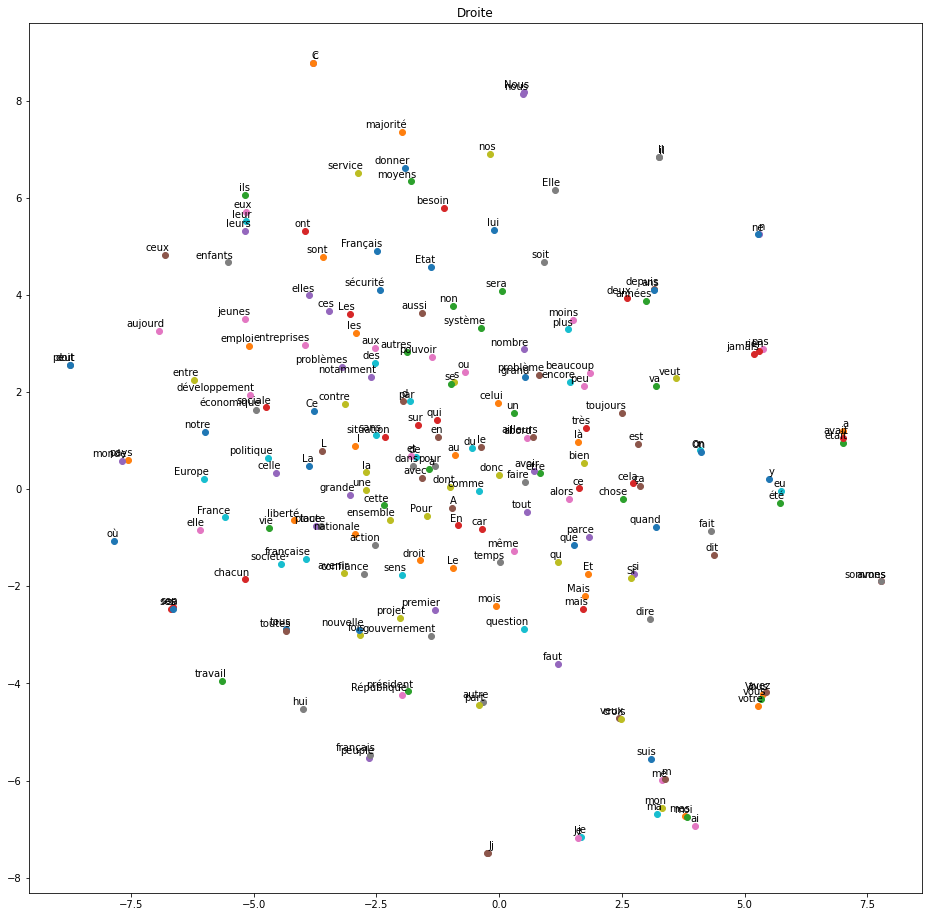



----- Gauche ------
----- step 1 -----
----- step 2 -----
----- step 3 -----


<ipython-input-16-cfbcd7566faa>:13: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  tokens.append(model[word])


----- step 4 -----
----- step 5 -----
 > 172 éléments


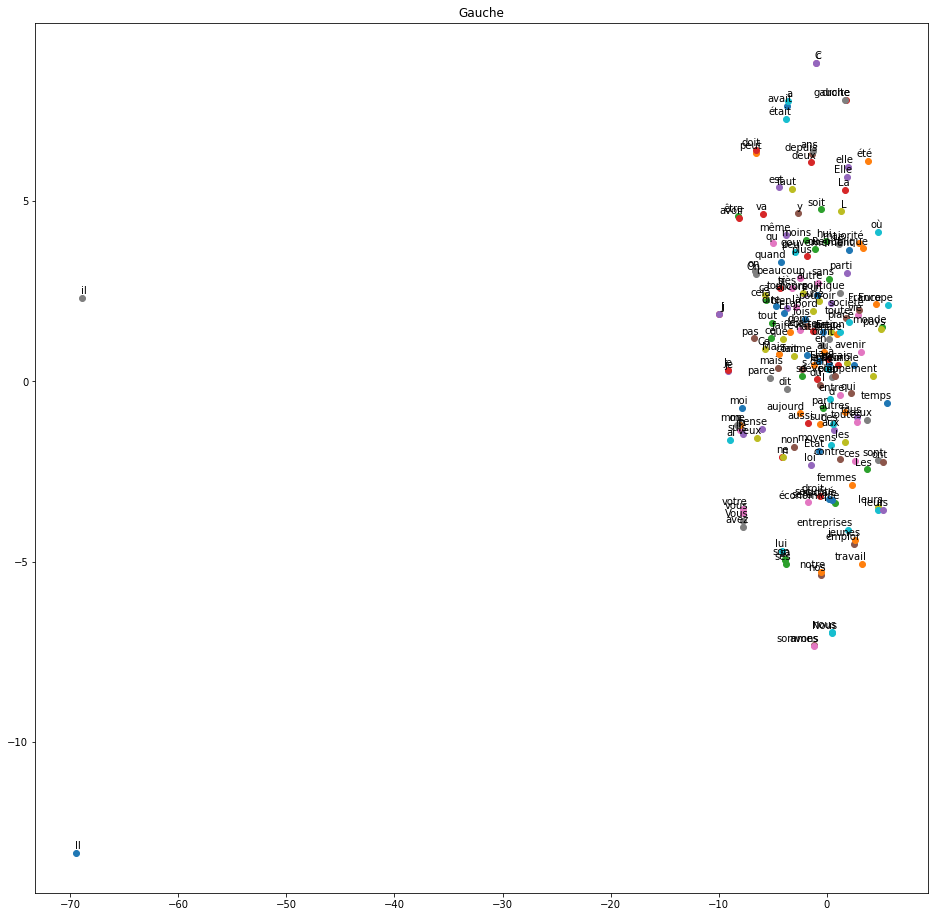

In [16]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# ----- En fonction de la vercion prendre l'un ou l'autre -----
#from sklearn.datasets import fetch_mldata
from sklearn.datasets import fetch_openml

def tsne_plot(plot_title, model) :
    labels, tokens = [], []
    print("----- step 1 -----")
    for word in model.wv.vocab :
        tokens.append(model[word])
        labels.append(word)
        #print(word)

    print("----- step 2 -----")
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    print("----- step 3 -----")
    new_values = tsne_model.fit_transform(tokens)
    
    print("----- step 4 -----")
    x, y= [], []
    for value in new_values :
        x.append(value [0])
        y.append(value [1])
    
    plt.figure(figsize =(16 , 16))
    print("----- step 5 -----")
    print(" > "+str(len(x))+' éléments')
    for i in range(len(x)) :
        #print('label : '+labels[i])
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
        xy=(x[i], y[i]),
        xytext =(5, 2),
        textcoords ='offset points', ha='right', va='bottom')
    plt.title(plot_title)
    plt.show()
    
embeddingsDroite.learn_restrictive(1500)
embeddingsGauche.learn_restrictive(1500)

print("----- Droite ----- ")
tsne_plot('Droite', embeddingsDroite.get_model())

print("\n\n----- Gauche ------")
tsne_plot('Gauche', embeddingsGauche.get_model())

